<a href="https://colab.research.google.com/github/mixa15341/Data_Minimg/blob/main/3/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0_Pandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №5. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
%matplotlib inline
import pandas as pd
pd.__version__

'2.2.2'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [2]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [3]:
print(df.tail(10))

       age      workclass  fnlwgt      education  education.num  \
32551   32        Private   34066           10th              6   
32552   43        Private   84661      Assoc-voc             11   
32553   32        Private  116138        Masters             14   
32554   53        Private  321865        Masters             14   
32555   22        Private  310152   Some-college             10   
32556   27        Private  257302     Assoc-acdm             12   
32557   40        Private  154374        HS-grad              9   
32558   58        Private  151910        HS-grad              9   
32559   22        Private  201490        HS-grad              9   
32560   52   Self-emp-inc  287927        HS-grad              9   

            marital.status          occupation    relationship  \
32551   Married-civ-spouse   Handlers-cleaners         Husband   
32552   Married-civ-spouse               Sales         Husband   
32553        Never-married        Tech-support   Not-in-family  

2) Сколько колонок и сколько строк в этом датасете?

In [4]:
num_rows, num_columns = df.shape

print(f"Количество строк: {num_rows}")
print(f"Количество столбцов: {num_columns}")

Количество строк: 32561
Количество столбцов: 15


3) Какие типы данных у элементов этого датасета?

In [5]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


4) Какие признаки имеют пропуски?

In [6]:
miss= df.isnull().sum()
print(miss[miss > 0])

workclass         1836
occupation        1843
native.country     583
dtype: int64


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: не удалось установить данные о месте работы, профессии и  стране, откуда родом человек. Предположительно - отказ давать ответ.

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [7]:
workclasses = df['workclass'].value_counts()

print(workclasses)

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


7) Какой средний возраст женщин и мужчин?

In [8]:
age_mean = df.groupby('sex')['age'].mean()
print(age_mean)

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

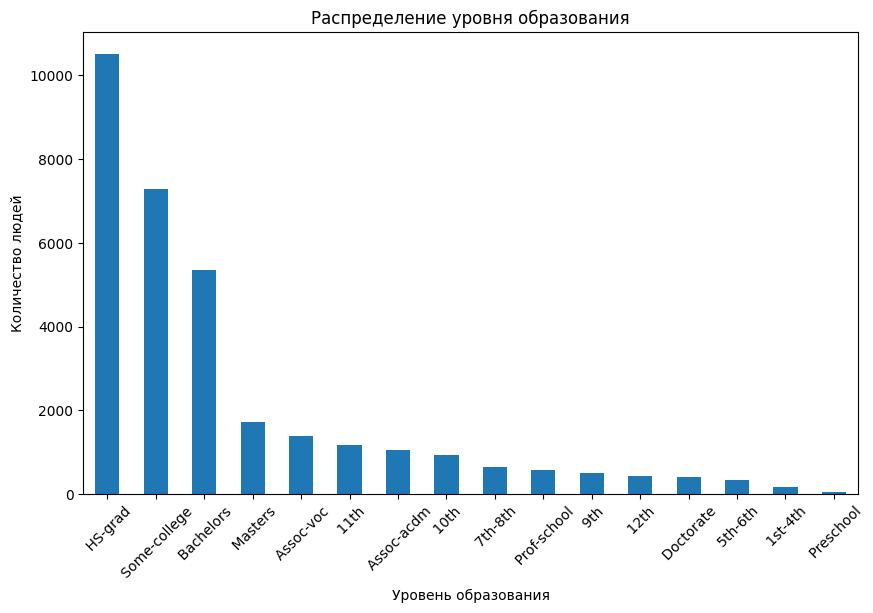

In [9]:
from matplotlib import pyplot as plt
education_counts = df['education'].value_counts()
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar')
plt.title('Распределение уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество людей')
plt.xticks(rotation=45)
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [10]:
b_salary = df[df['income'] == ' >50K']
s_salary = df[df['income'] == ' <=50K']

mean_age_b_salary = b_salary['age'].mean()
std_age_b_salary = b_salary['age'].std()

mean_age_s_salary = s_salary['age'].mean()
std_age_s_salary = s_salary['age'].std()

print(f"Средний возраст тех, кто получает более 50K в год: {mean_age_b_salary:.2f}")
print(f"Среднеквадратичное отклонение возраста тех, кто получает более 50K в год: {std_age_b_salary:.2f}")

print(f"Средний возраст тех, кто получает менее 50K в год: {mean_age_s_salary:.2f}")
print(f"Среднеквадратичное отклонение возраста тех, кто получает менее 50K в год: {std_age_s_salary:.2f}")

Средний возраст тех, кто получает более 50K в год: 44.25
Среднеквадратичное отклонение возраста тех, кто получает более 50K в год: 10.52
Средний возраст тех, кто получает менее 50K в год: 36.78
Среднеквадратичное отклонение возраста тех, кто получает менее 50K в год: 14.02


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [11]:
higher_education = [" Bachelors", " Prof-school", " Assoc-acdm", " Assoc-voc", " Masters", " Doctorate"]
all_higher_education = b_salary['education'].isin(higher_education).all()
if all_higher_education:
    print("Все люди, которые получают больше 50K, имеют как минимум высшее образование.")
else:
    print("Не все люди, которые получают больше 50K, имеют высшее образование.")

Не все люди, которые получают больше 50K, имеют высшее образование.


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [12]:
men = df[df['sex'] == ' Male']
married_statuses = [' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse']
married_men = men[men['marital.status'].isin(married_statuses)]
single_men = men[~men['marital.status'].isin(married_statuses)]
rich_married_men = married_men[married_men['income'] == ' >50K'].shape[0] / married_men.shape[0]
rich_single_men = single_men[single_men['income'] == ' >50K'].shape[0] / single_men.shape[0]

print(f"Доля зарабатывающих >50K среди женатых мужчин: {rich_married_men:.2%}")
print(f"Доля зарабатывающих >50K среди холостых мужчин: {rich_single_men :.2%}")

if rich_married_men > rich_single_men :
    print("Среди женатых мужчин больше доля зарабатывающих более 50K.")
else:
    print("Среди холостых мужчин больше доля зарабатывающих более 50K.")

Доля зарабатывающих >50K среди женатых мужчин: 44.05%
Доля зарабатывающих >50K среди холостых мужчин: 8.45%
Среди женатых мужчин больше доля зарабатывающих более 50K.


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



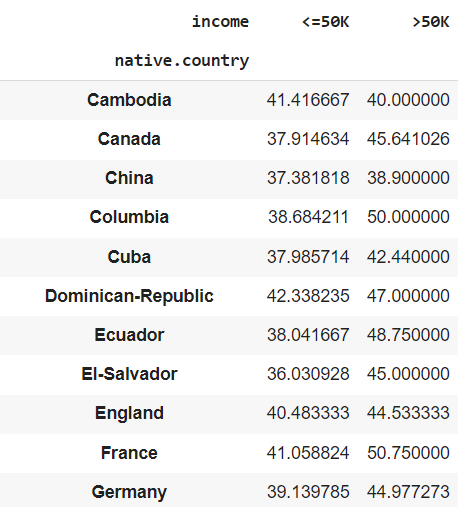

In [13]:
pivot_table = df.pivot_table(values='hours.per.week', index='native.country', columns='income', aggfunc='mean')
print(pivot_table)

income                          <=50K       >50K
native.country                                  
Cambodia                    41.416667  40.000000
Canada                      37.914634  45.641026
China                       37.381818  38.900000
Columbia                    38.684211  50.000000
Cuba                        37.985714  42.440000
Dominican-Republic          42.338235  47.000000
Ecuador                     38.041667  48.750000
El-Salvador                 36.030928  45.000000
England                     40.483333  44.533333
France                      41.058824  50.750000
Germany                     39.139785  44.977273
Greece                      41.809524  50.625000
Guatemala                   39.360656  36.666667
Haiti                       36.325000  42.750000
Holand-Netherlands          40.000000        NaN
Honduras                    34.333333  60.000000
Hong                        39.142857  45.000000
Hungary                     31.300000  50.000000
India               

13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

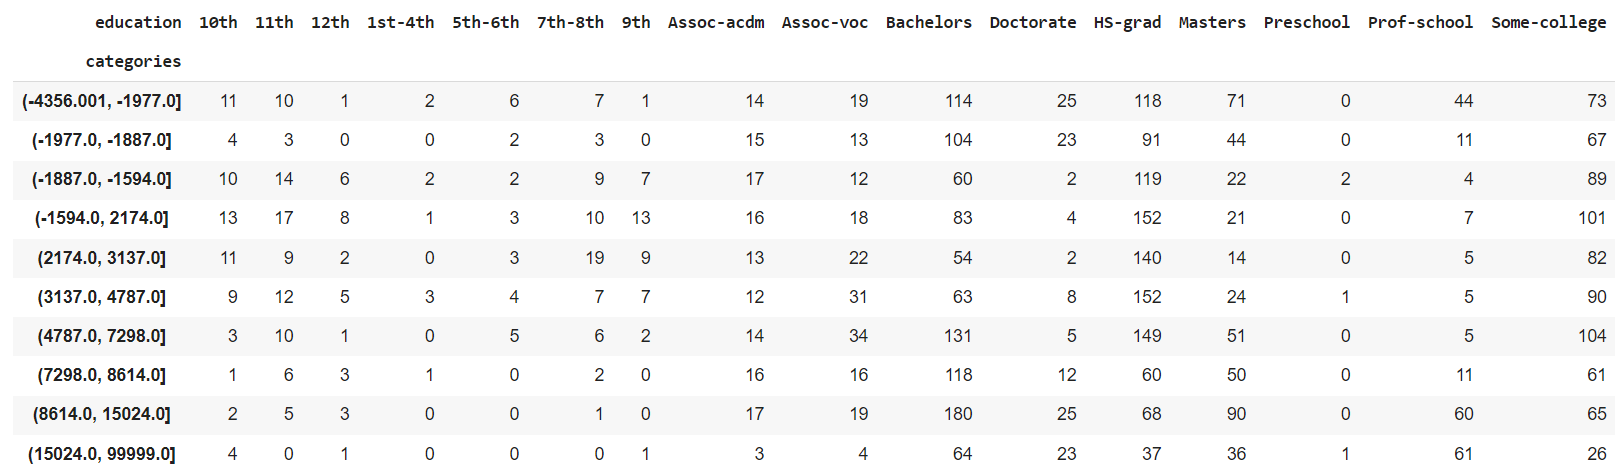

In [14]:
summary_table = pd.DataFrame()
summary_table['education'] = df['education']
summary_table['capital.diff'] = df['capital.gain'] - df['capital.loss']
summary_table = summary_table[summary_table['capital.diff'] != 0]
summary_table['categories'] = pd.qcut(summary_table['capital.diff'], q=10)
pivot_table = summary_table.pivot_table(values='capital.diff', index='categories', columns='education', aggfunc='count')
print(pivot_table)

education             10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  \
categories                                                               
(-4356.001, -1977.0]    11    10     1        2        6        7    1   
(-1977.0, -1887.0]       4     3     0        0        2        3    0   
(-1887.0, -1594.0]      10    14     6        2        2        9    7   
(-1594.0, 2174.0]       13    17     8        1        3       10   13   
(2174.0, 3137.0]        11     9     2        0        3       19    9   
(3137.0, 4787.0]         9    12     5        3        4        7    7   
(4787.0, 7298.0]         3    10     1        0        5        6    2   
(7298.0, 8614.0]         1     6     3        1        0        2    0   
(8614.0, 15024.0]        2     5     3        0        0        1    0   
(15024.0, 99999.0]       4     0     1        0        0        0    1   

education             Assoc-acdm  Assoc-voc  Bachelors  Doctorate  HS-grad  \
categories                       

<ipython-input-14-3f190ed677cf>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = summary_table.pivot_table(values='capital.diff', index='categories', columns='education', aggfunc='count')


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [15]:
rich_women = df[(df['sex'] == ' Female') & (df['income'] == ' >50K')]
women = df[df['sex'] == ' Female']
rich_count = rich_women['native.country'].value_counts()
total = women['native.country'].value_counts()
proportions = (rich_count/ total).sort_values(ascending=False)
print(proportions)

native.country
Yugoslavia                    0.333333
Taiwan                        0.266667
France                        0.250000
Japan                         0.250000
Iran                          0.250000
China                         0.238095
Italy                         0.238095
Canada                        0.230769
Scotland                      0.200000
Greece                        0.200000
England                       0.187500
India                         0.181818
Hong                          0.166667
Hungary                       0.166667
Portugal                      0.166667
Philippines                   0.164384
Honduras                      0.142857
Ireland                       0.142857
Laos                          0.125000
Germany                       0.116667
United-States                 0.110721
Poland                        0.105263
South                         0.100000
Thailand                      0.090909
Nicaragua                     0.083333
Cuba      

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [17]:
import random
# Функция для генерации случайной зарплаты
def generate_magic_salary(income):
    if income == '<=50K':
        return random.randint(0, 51)
    else:
        return random.randint(51, 201)
df['magic_salary'] = df['income'].apply(generate_magic_salary)
df['hourly_magic_salary'] = df['magic_salary'] / df['hours.per.week']
average_salary = df.groupby('education')['hourly_magic_salary'].mean()
print(average_salary)

education
10th            4.652629
11th            5.004173
12th            4.365483
1st-4th         4.171155
5th-6th         3.755476
7th-8th         4.248579
9th             4.094093
Assoc-acdm      4.051010
Assoc-voc       3.758940
Bachelors       3.463266
Doctorate       3.577601
HS-grad         3.650090
Masters         3.531452
Preschool       4.033925
Prof-school     3.210932
Some-college    4.024621
Name: hourly_magic_salary, dtype: float64


## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [20]:
df = pd.read_csv('/content/bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

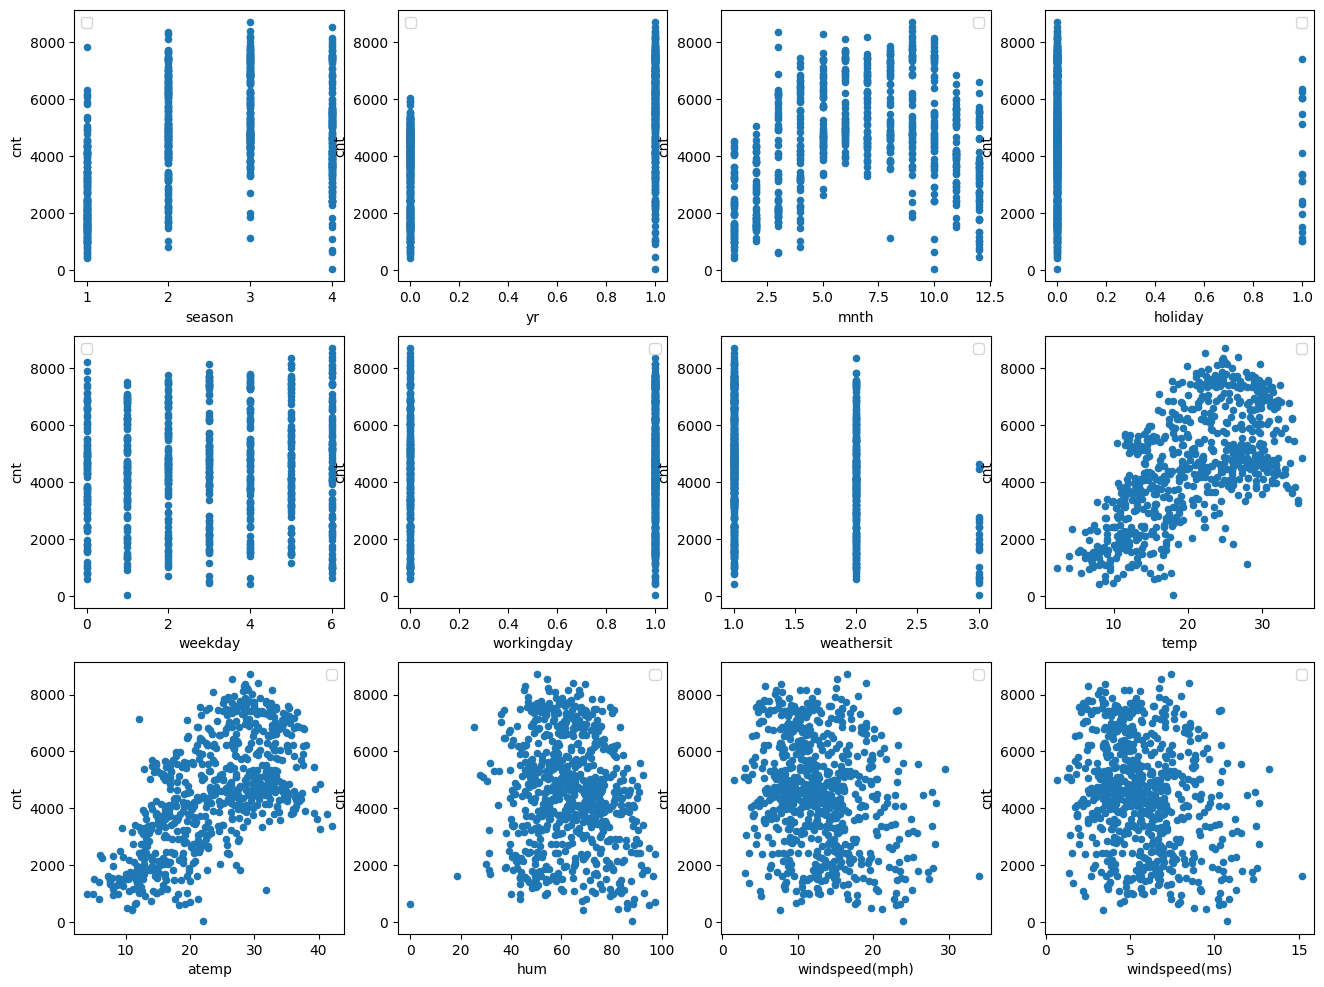

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





ответ: возрастает весной пик летом и снижается к осени (парабола)

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.



Ответ: погода и рабочий/нерабочий день

### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



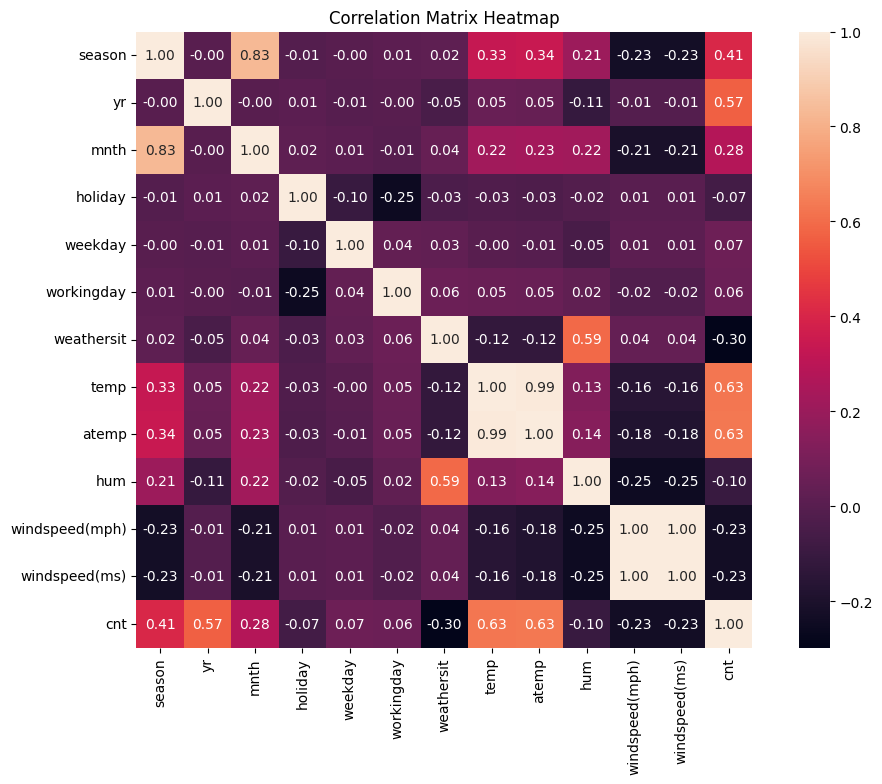

In [23]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, square=True, annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

1.   Меньше всего: workingday,weekday,holiday,hum
2.   Больше всего: temp,atemp,yr,season

### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



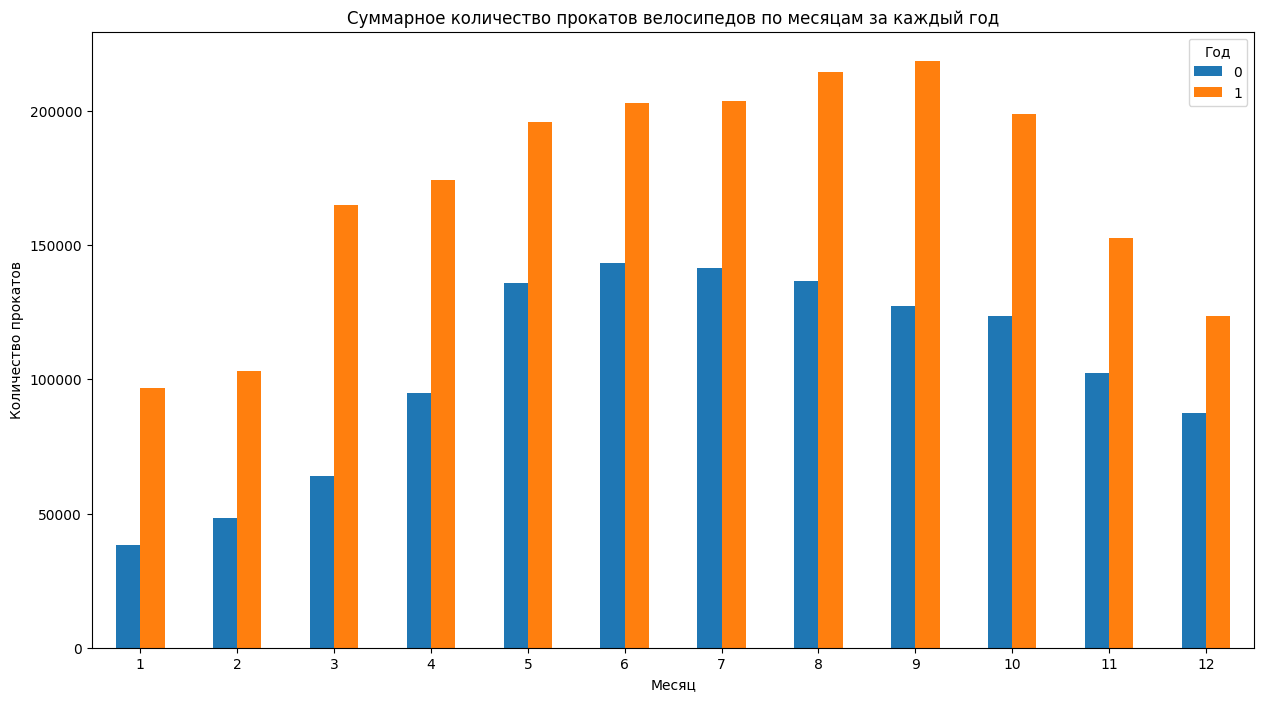

In [28]:
grouped = df.groupby(['mnth', 'yr'])['cnt'].sum().unstack()
grouped.plot(kind='bar', figsize=(15, 8))

plt.title('Суммарное количество прокатов велосипедов по месяцам за каждый год')
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов')
plt.legend(title='Год')
plt.xticks(rotation=0)

plt.show()

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: потому что в 2012 году значительно увеличилось количество прокатов в каждом месяце

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



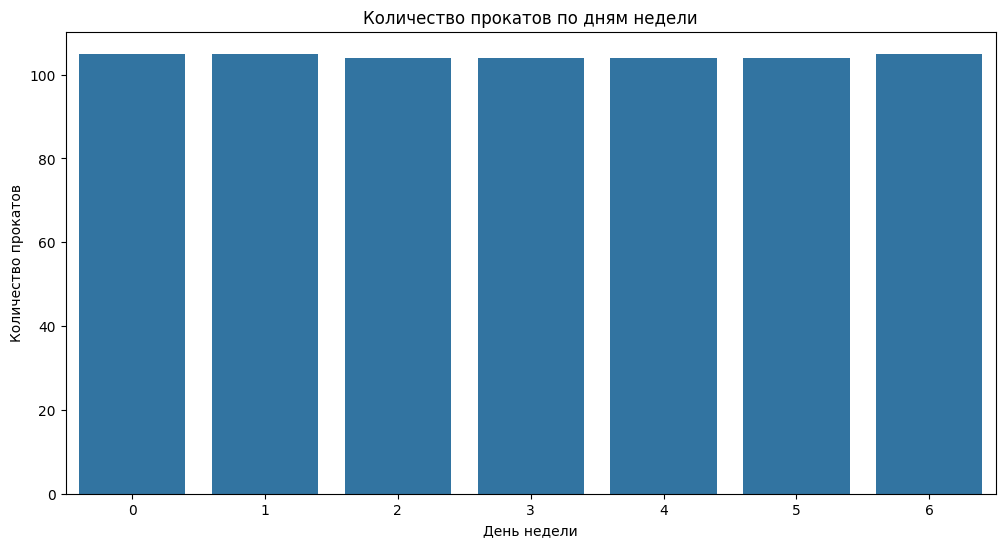

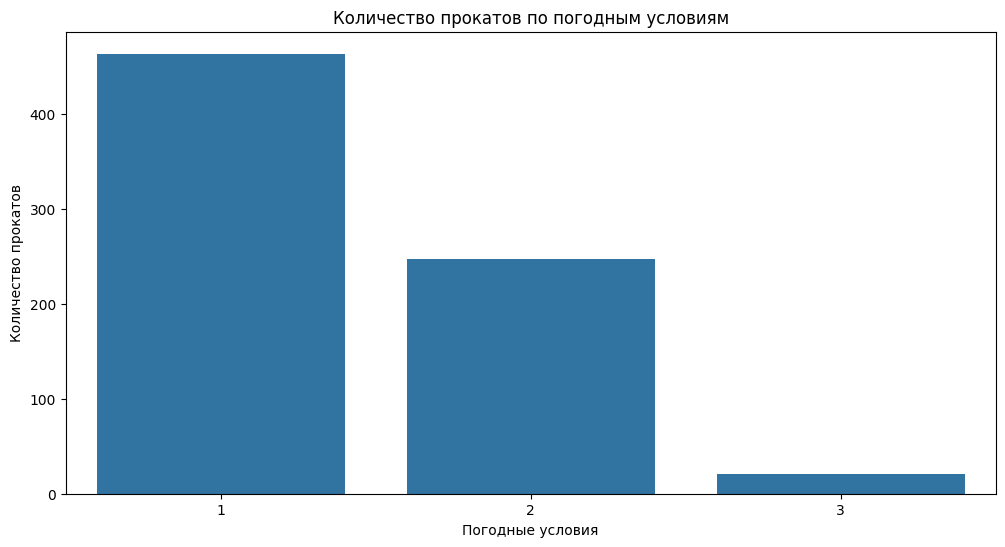

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='weekday', data=df)
plt.title('Количество прокатов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество прокатов')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='weathersit', data=df)
plt.title('Количество прокатов по погодным условиям')
plt.xlabel('Погодные условия')
plt.ylabel('Количество прокатов')
plt.show()

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



Ответ:

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?


    
Ответ: равномерное

### 5. Распределение

Постройте распределение целевого признака.


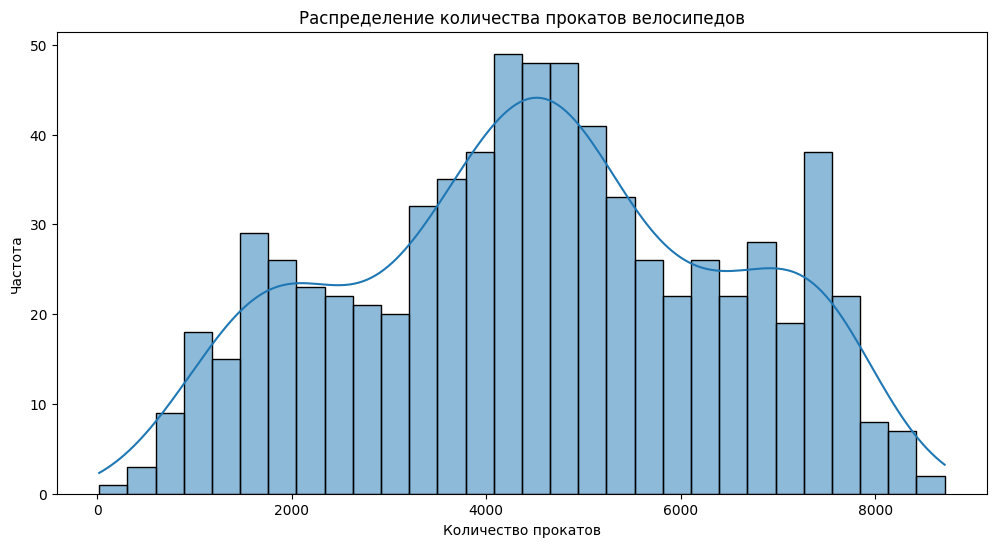

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Распределение количества прокатов велосипедов')
plt.xlabel('Количество прокатов')
plt.ylabel('Частота')
plt.show()


**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

Ответ: ~5000

### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



<Figure size 1200x600 with 0 Axes>

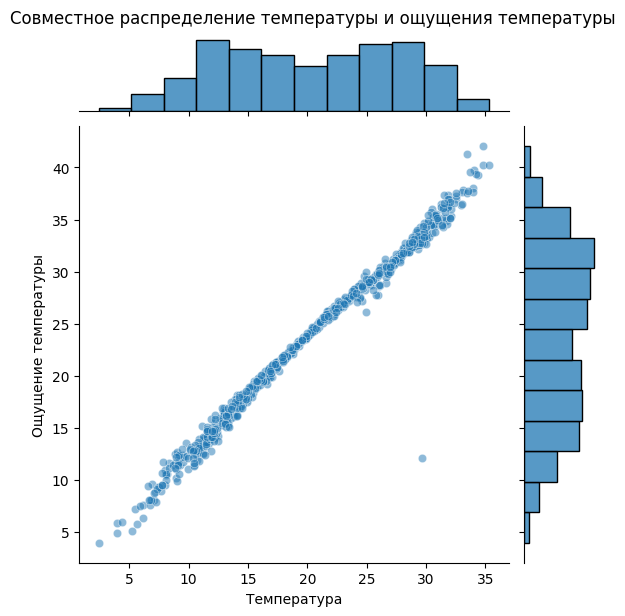

In [27]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='temp', y='atemp', data=df, kind='scatter', alpha=0.5)
plt.suptitle('Совместное распределение температуры и ощущения температуры', y=1.02)
plt.xlabel('Температура')
plt.ylabel('Ощущение температуры')
plt.show()

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: "выброс точки". Ощущение 12 при темпераутре 30.

---



### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




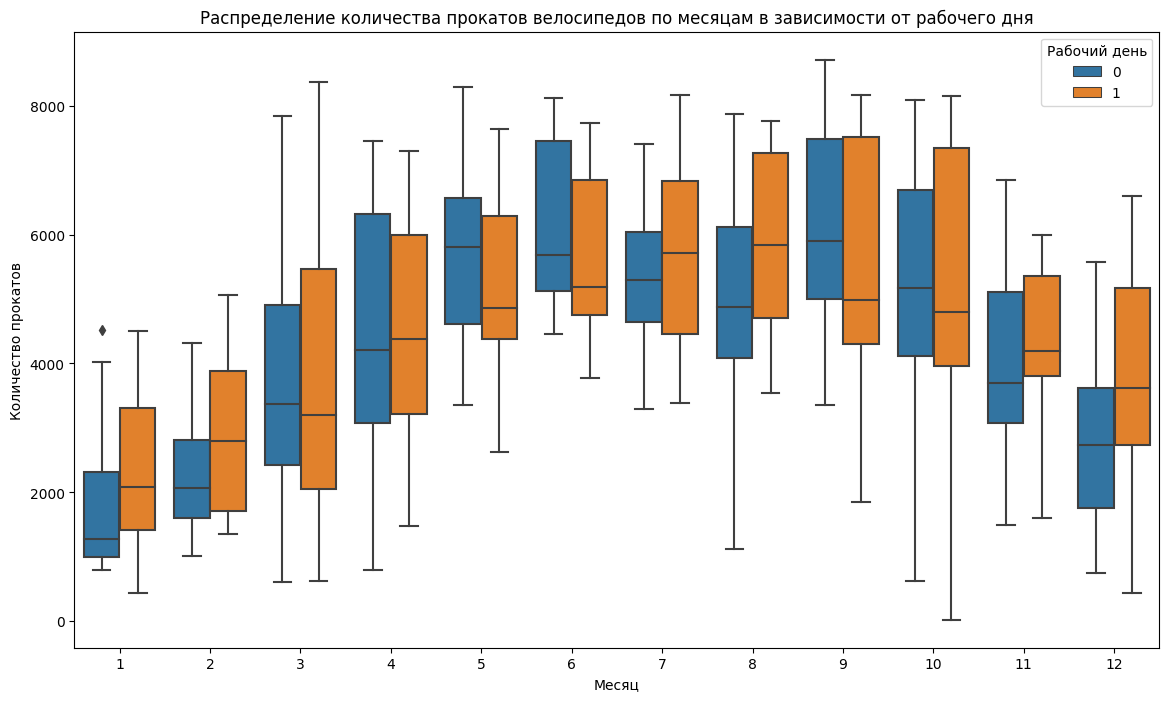

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df)
plt.title('Распределение количества прокатов велосипедов по месяцам в зависимости от рабочего дня')
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов')
plt.legend(title='Рабочий день', loc='upper right')
plt.show()

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Ответ:

1.   Лето
2.   Праздники



## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [ ]:
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
colab = True # если работаете на своём компьютере, в локальной среде, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [ ]:
#if colab:
 #   df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
#else:
df = pd.read_csv('/content/StudentsPerformance.csv')

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


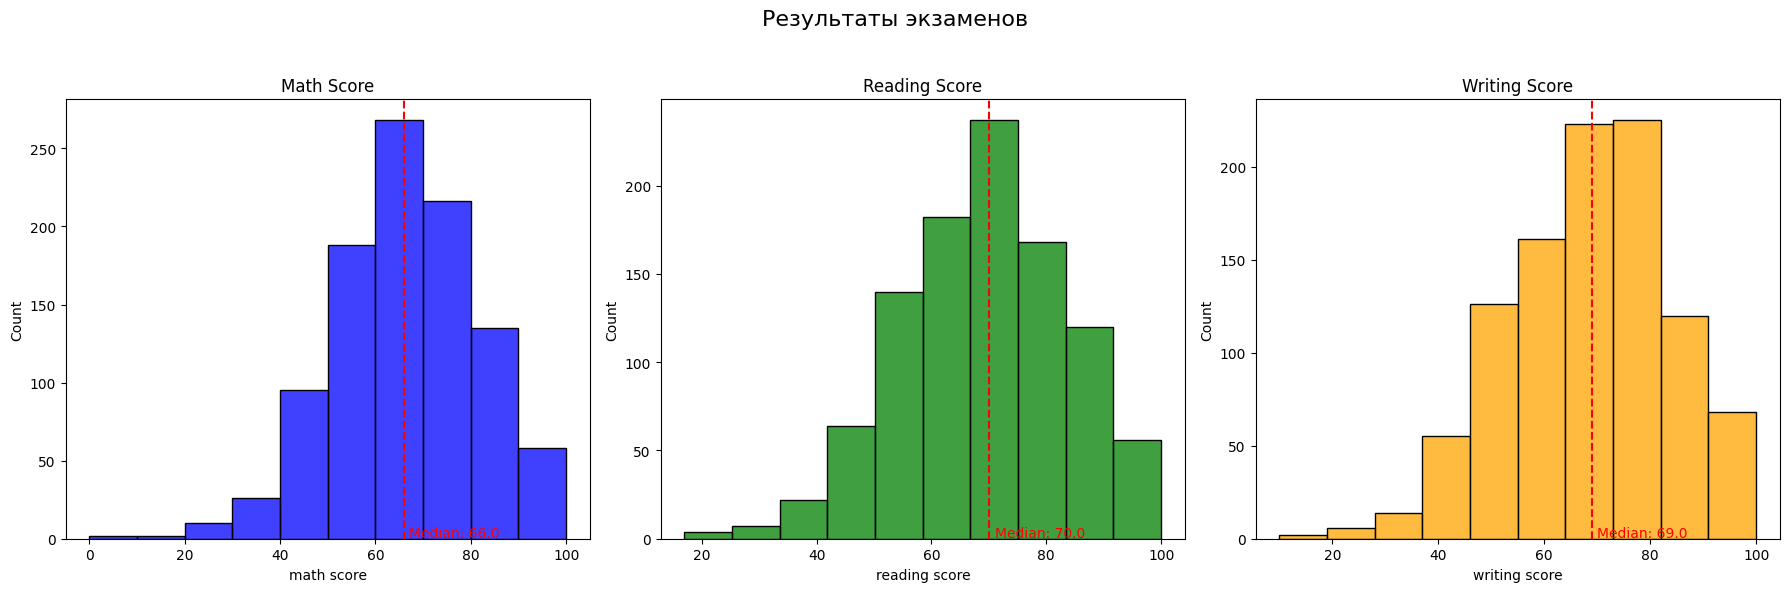

Медианное значение для математики: 66.0
Медианное значение для чтения: 70.0
Медианное значение для письма: 69.0


In [ ]:
# Вычисление медианных значений
median_math = df['math score'].median()
median_reading = df['reading score'].median()
median_writing = df['writing score'].median()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df['math score'], bins=10, kde=False, ax=axes[0], color='blue')
axes[0].axvline(median_math, color='red', linestyle='--')
axes[0].text(median_math + 1, 1, f'Median: {median_math}', color='red')
axes[0].set_title('Math Score')

sns.histplot(df['reading score'], bins=10, kde=False, ax=axes[1], color='green')
axes[1].axvline(median_reading, color='red', linestyle='--')
axes[1].text(median_reading + 1, 1, f'Median: {median_reading}', color='red')
axes[1].set_title('Reading Score')

sns.histplot(df['writing score'], bins=10, kde=False, ax=axes[2], color='orange')
axes[2].axvline(median_writing, color='red', linestyle='--')
axes[2].text(median_writing + 1, 1, f'Median: {median_writing}', color='red')
axes[2].set_title('Writing Score')

fig.suptitle('Результаты экзаменов', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Вывод медианных значений
print(f"Медианное значение для математики: {median_math}")
print(f"Медианное значение для чтения: {median_reading}")
print(f"Медианное значение для письма: {median_writing}")

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


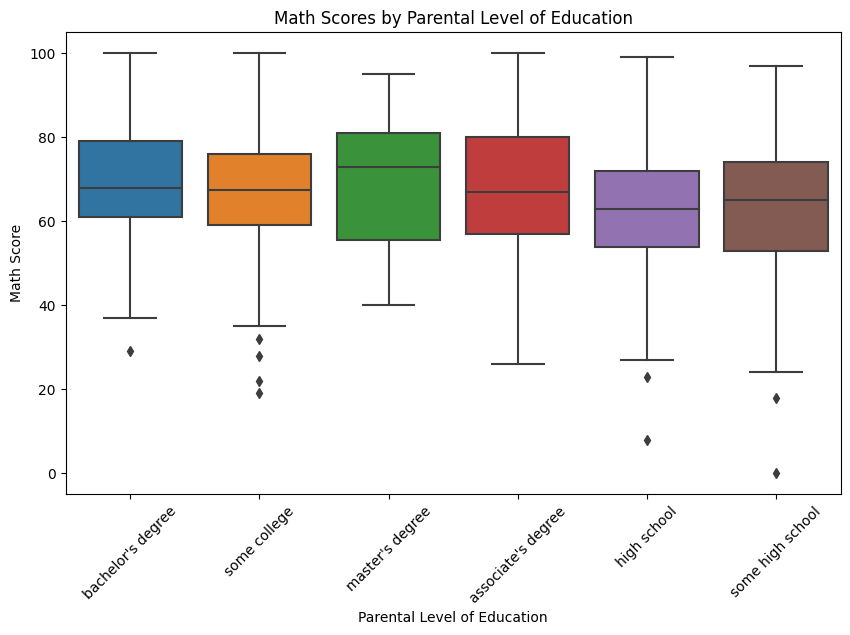

In [ ]:
education_counts = df['parental level of education'].value_counts()
print(education_counts)
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title('Math Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Math Score')
plt.xticks(rotation=45)
plt.show()

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [ ]:
high_achieving_females = df[
    (df['gender'] == 'female') &
    (df['math score'] > 90) &
    (df['reading score'] > 90) &
    (df['writing score'] > 90)
]
num_high_achieving_females = high_achieving_females['gender'].value_counts()
print(num_high_achieving_females)

gender
female    17
Name: count, dtype: int64


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [ ]:
agg_results = df.groupby('gender').agg({
    'math score': ['min', 'max', 'median'],
    'reading score': ['min', 'max', 'median'],
    'writing score': ['min', 'max', 'median']
})

print(agg_results)

       math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0  


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

In [ ]:
# Добавление столбца со средним баллом
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Группировка по полу, типу обеда и подготовке к тесту, вычисление среднего балла
agg_results = df.groupby(['gender', 'lunch', 'test preparation course']).agg({
    'average score': 'mean'
}).reset_index()

print(agg_results)

   gender         lunch test preparation course  average score
0  female  free/reduced               completed      69.528571
1  female  free/reduced                    none      59.501401
2  female      standard               completed      77.479532
3  female      standard                    none      70.961240
4    male  free/reduced               completed      65.721311
5    male  free/reduced                    none      58.323810
6    male      standard               completed      73.513274
7    male      standard                    none      65.486043


#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

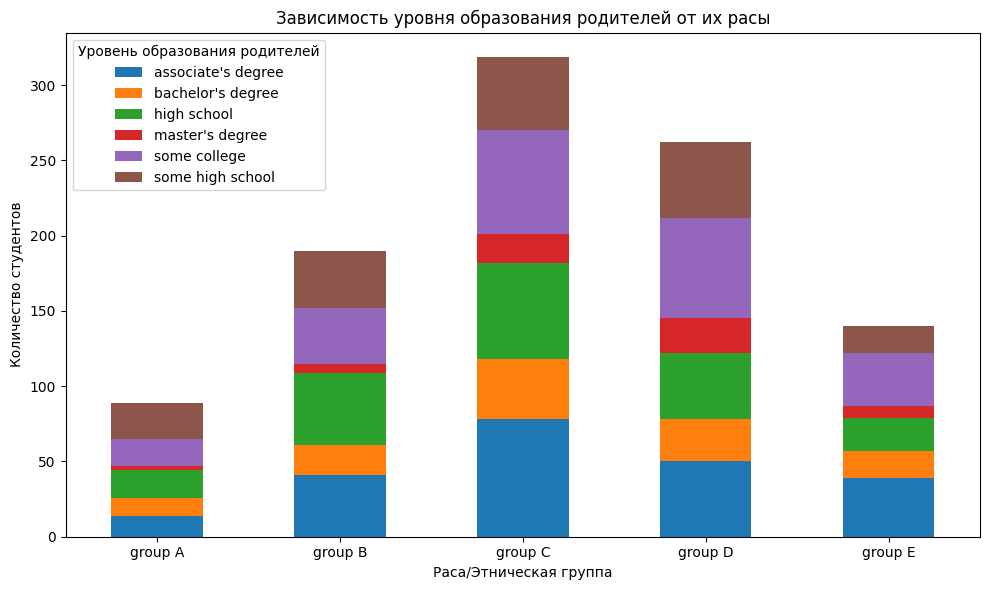

In [ ]:
# Группировка данных по расе и уровню образования родителей
grouped_data = df.groupby(['race/ethnicity', 'parental level of education']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Зависимость уровня образования родителей от их расы')
plt.xlabel('Раса/Этническая группа')
plt.ylabel('Количество студентов')
plt.legend(title='Уровень образования родителей')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

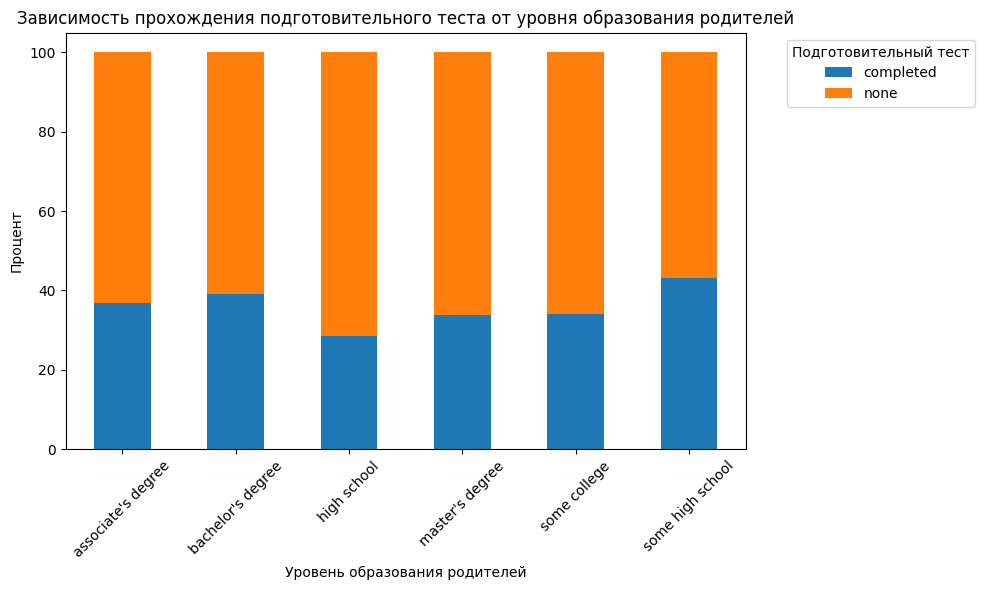

In [ ]:
grouped_data = df.groupby(['parental level of education', 'test preparation course']).size().unstack()
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

grouped_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Процент')
plt.legend(title='Подготовительный тест', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

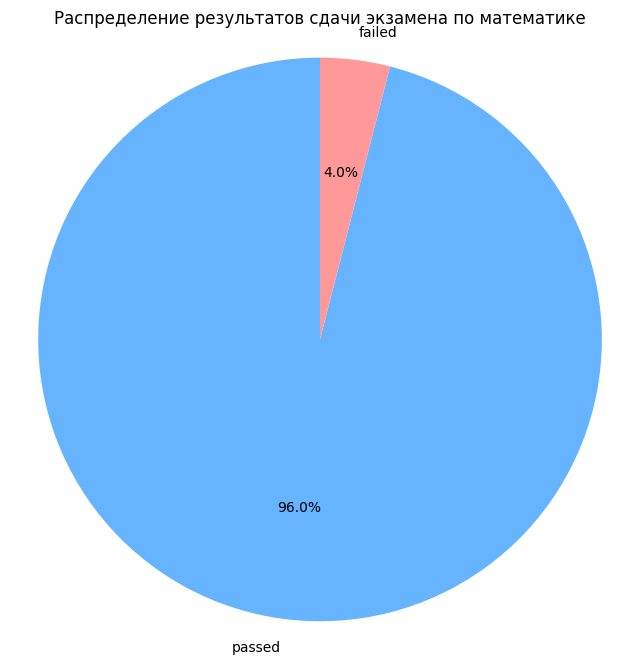

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Добавление столбца с результатом сдачи экзамена по математике
df['math result'] = df['math score'].apply(lambda x: 'passed' if x >= 40 else 'failed')
result_counts = df['math result'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Распределение результатов сдачи экзамена по математике')
plt.axis('equal')

plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

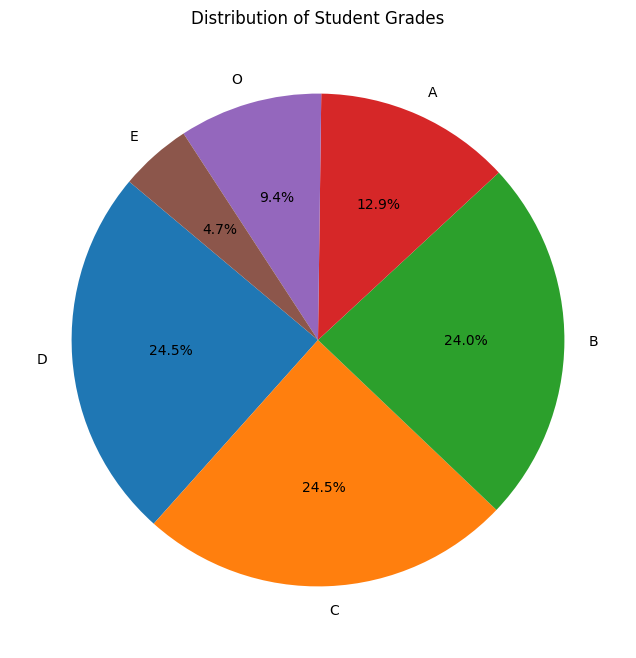

In [ ]:
# Вычисляем средний балл по трём экзаменам
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Функция для присвоения оценки
def assign_grade(row):
    if row['math score'] < 40:
        return 'E'
    elif row['average_score'] <= 40:
        return 'E'
    elif 41 <= row['average_score'] <= 60:
        return 'D'
    elif 61 <= row['average_score'] <= 70:
        return 'C'
    elif 71 <= row['average_score'] <= 80:
        return 'B'
    elif 81 <= row['average_score'] <= 90:
        return 'A'
    else:
        return 'O'

df['grade'] = df.apply(assign_grade, axis=1)

grade_counts = df['grade'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Student Grades')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

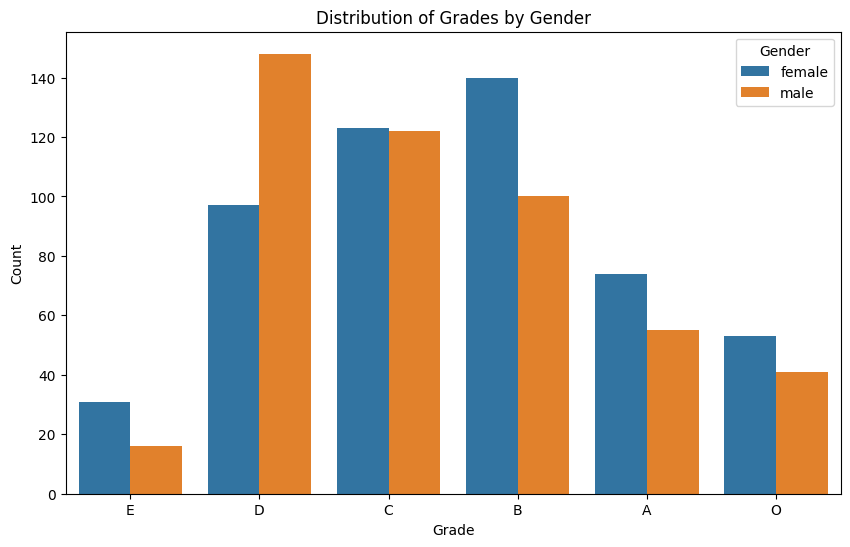

gender
female    267
male      196
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade', hue='gender', order=['E', 'D', 'C', 'B', 'A', 'O'])
plt.title('Distribution of Grades by Gender')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

grades_counts = df[df['grade'].isin(['O', 'A', 'B'])]['gender'].value_counts()
print(grades_counts)
